E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


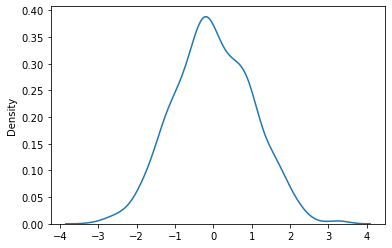

In [1]:
from numpy import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

random_array = random.normal(size=1000)
sns.distplot(random_array, hist=False)

plt.show() 

In [2]:
series = pd.Series(random_array)

Перед вами нормально-распределенный массив сконвертированный в Pandas Series. Необходимо расчитать следующие статистики для массива (series), используя только собственно-написанные формулы:
* среднее значение 
* медиану 
* стандартное отклонение
* межквартильный размах
* 23-й перцентиль


In [3]:
series

0      0.749756
1     -1.891696
2     -0.346793
3      1.669909
4      1.459494
         ...   
995   -0.671254
996   -0.890909
997    1.603165
998   -1.291389
999    0.959124
Length: 1000, dtype: float64

## Среднее значение

Пусть дана выборка $Х = (x_1, x_2,..., x_n)$
 из значений одномерной случайной величины. Одной из наиболее естественных статистик таких выборок является **среднее арифметическое** (или **выборочное среднее**). Оно обозначается как $\overline{X}$: $$\overline{X} = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n x_i$$
 

Выборочное среднее является **оценкой** для математического ожидания. Это означает, что, как правило, чем больше элементов в выборке, тем ближе выборочное среднее этой выборки к математическому ожиданию соответствующей случайной величины.

In [4]:
#функция среднего значения
def meanz(series):
    s = 0 
    for number in series:
        s += number
    return s / series.size

In [5]:
meanz(series)

-0.0038253151122978205

In [6]:
#проверка написанной функции на встроенной .mean()
series.mean()

-0.0038253151122978205

In [7]:
# также можно сделать проверку и при помощи numpy
np.mean(series) #используем встроенную функцию `np.mean()`

-0.0038253151122978205

In [8]:
#выведем сравнение для наглядного понимания итога.
print(f'Среднее значение по написанной нам функции: \n{meanz(series)}')
print(f'Среднее значение по встроенной функции mean() в pandas: \n{series.mean()}')
print(f'Среднее значение по встроенной функции np.mean() в numpy: \n{np.mean(series)}')

Среднее значение по написанной нам функции: 
-0.0038253151122978205
Среднее значение по встроенной функции mean() в pandas: 
-0.0038253151122978205
Среднее значение по встроенной функции np.mean() в numpy: 
-0.0038253151122978205


## Медиана

**Медиана** — такое значение $t$, что половина элементов из выборки меньше, либо равна $t$, и, соответственно, половина больше, либо равна $t$.

Медиана представляет собой середину выборки: если отсортировать элементы выборки по возрастанию, то медиана приходится на середину.

Медиана может приходиться как на промежуток между элементами выборки, так и на конкретный элемент.

In [9]:
#функция медианы
def medianz(series):
    series = sorted(series)
    if len(series)%2 == 0:
        left_idx = len(series)//2 - 1
        right_idx = len(series)//2
        return (series[left_idx] + series[right_idx])/2
    else:
        center_idx = len(series)//2
        return series[center_idx]

In [10]:
medianz(series)

-0.05067364130081363

In [11]:
#проверка написанной функции на встроенной .median() в pandas
series.median()

-0.05067364130081363

In [12]:
#проверка написанной функции на встроенной .median() в numpy
np.median(series)

-0.05067364130081363

In [13]:
print(f'Медиана по написанной нам функции: \n{medianz(series)}')
print(f'Медиана по встроенной функции mean() в pandas: \n{series.median()}')
print(f'Медиана по встроенной функции np.mean() в numpy: \n{np.median(series)}')

Медиана по написанной нам функции: 
-0.05067364130081363
Медиана по встроенной функции mean() в pandas: 
-0.05067364130081363
Медиана по встроенной функции np.mean() в numpy: 
-0.05067364130081363


## Стандартное отклонение

Пусть $X, X_1,..., X_n$ - выборка.

**Стандартное отклонение (Standart Deviation)** (или среднеквадратичное отклонение выборки) оценивается по формуле: $$SD = \sqrt{\dfrac{\sum_{i = 1}^n(X_i - \overline{X})^2}{n-1}}$$
 
где $\overline{X}$ - среднее значение выборки. 

In [14]:
#функция стандартного отклонения
def stdz(series):
    m = sum(series)/len(series)
    summa = 0
    for i in series:
        summa += (i-m)**2
    s = math.sqrt(summa/(len(series)))
    return s

In [15]:
stdz(series)

1.0199126289357288

In [16]:
#проверка написанной функции на встроенной .std() в pandas
series.std()

1.0204229680364343

In [17]:
#проверка написанной функции на встроенной .median() в numpy
np.std(series)

1.0199126289357288

In [18]:
print(f'Стандартное отклонение по написанной нам функции: \n{stdz(series)}')
print(f'Стандартное отклонение по встроенной функции mean() в pandas: \n{series.std()}')
print(f'Стандартное отклонение по встроенной функции np.mean() в numpy: \n{np.std(series)}')

Стандартное отклонение по написанной нам функции: 
1.0199126289357288
Стандартное отклонение по встроенной функции mean() в pandas: 
1.0204229680364343
Стандартное отклонение по встроенной функции np.mean() в numpy: 
1.0199126289357288


## Межквартильный размах

Стоит упомянуть, что такое межквартильный размах.

**Межквартильный размах** - это разница между первым квартилем (25-й процентиль) и третьим квартилем (75-й процентиль). Как правило, обозначается как $IQR$ и рассчитывается по формуле $Q_3 - Q_1$, 

где $Q-1$ - это первый квартиль, а $Q_3$ - третий квартиль.

Медиана является частным случаем более общего понятия — _квантиля_.

Пусть $\alpha \in (0, 1)$. __Квантиль порядка $\alpha$__ — такое число $t_\alpha$, что «$\alpha$ процентов» всех элементов выборки меньше $t_\alpha$ и, соответственно, «$(1 - \alpha)$ процентов» элементов — больше $t_\alpha$.

Как и в случае с медианой, квантиль может как приходиться на один из элементов выборки, так и лежать где-то между ними.

Из определения следует, что медиана является квантилем порядка $0.5$. Кроме того, часто используют:
- __первый квартиль__ — квантиль порядка $0.25$ (т.е. значение, которое не превышают $25 \%$ значений из выборки),
-  __второй квартиль__ — то же, что и медиана,
-  __третий квартиль__ — квантиль порядка $0.75$.

Также могут встречаться:

- __децили__ — то же, что и квартили, но делим мы не на $4$ части, а на $10$. Например, медиана будет пятым децилем,
- __перцентили__ — это просто другой способ задать квантиль. Здесь мы используем не долю $\alpha \in (0, 1)$, а процент. Например, третий квартиль будет $75$-перцентилем.
   

In [19]:
#функция межквартильного размаха
def quantile(serie, alpha):
    n_serie = sorted(serie)
    index = (len(n_serie)-1)*alpha
    if index % 10 != 0:
        return (n_serie[int(index)]+n_serie[int(index)+1])/2
#     if isinstance(index,int):
#         return (n_serie[index - 1] + n_serie[index]) / 2
    else:
        return n_serie[int(index)]
quartiles = [quantile(series, i) for i in (.25, .75)]
print("Первый квартиль = ", quartiles[0])
print("Третий квартиль = ", quartiles[1])
iqr = quartiles[1] - quartiles[0]
print(f'Межквартильный размах = {iqr}')

Первый квартиль =  -0.6974040070556624
Третий квартиль =  0.719434898554119
Межквартильный размах = 1.4168389056097814


In [20]:
# проверка в numpy при помощи функции .quantile()
tf = np.quantile(series, .25, interpolation = 'midpoint') 
sf = np.quantile(series, .75, interpolation = 'midpoint')
IQR = sf - tf
print(f'25% = {tf}')
print(f'75% = {sf}')
print(f'iqr = {IQR}')

25% = -0.6974040070556624
75% = 0.719434898554119
iqr = 1.4168389056097814


## 23-й перцентиль

Логика остается такая же как и при нахождении квартилей в задании про межквартильный размах, только в данном случае мы будем искать 23-й перцентиль

In [21]:
#функция межквартильного размаха
def quantile(serie, alpha):
    n_serie = sorted(serie)
    index = (len(n_serie)-1)*alpha
    if index % 10 != 0:
        return (n_serie[int(index)]+n_serie[int(index)+1])/2
#     if isinstance(index,int):
#         return (n_serie[index - 1] + n_serie[index]) / 2
    else:
        return n_serie[int(index)]
quartiles = quantile(series, 0.23)
print("Первый квартиль = ", quartiles)

Первый квартиль =  -0.7685933645279424


In [22]:
#проверка
qv_23 = np.quantile(series, .23, interpolation = 'midpoint')
qv_23

-0.7685933645279424